In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [7]:
from sklearn.linear_model import LogisticRegression


In [3]:
aloi = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\aloi-unsupervised-ad.csv", header = None)

In [4]:
aloi

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.872812,0.000005,0.000000,0.000036,0.000000,0.000000,0.0,0.000000,0.000000,0.050327,...,0.014212,0.000104,0.0,0.025490,0.004937,0.000011,0.000054,0.006804,0.015385,o
1,0.975206,0.000000,0.000000,0.000651,0.000000,0.000000,0.0,0.000000,0.000000,0.007039,...,0.000000,0.000000,0.0,0.004853,0.001582,0.000000,0.000000,0.000201,0.000000,o
2,0.963777,0.000000,0.000000,0.002005,0.000000,0.000000,0.0,0.000000,0.000000,0.006642,...,0.000000,0.000000,0.0,0.007828,0.002523,0.000000,0.000393,0.003800,0.000000,o
3,0.973246,0.000000,0.000000,0.000556,0.000000,0.000000,0.0,0.000000,0.000000,0.008979,...,0.000000,0.000000,0.0,0.004392,0.000170,0.000000,0.000000,0.000007,0.000000,o
4,0.960720,0.000000,0.000000,0.000656,0.000000,0.000000,0.0,0.000000,0.000000,0.013319,...,0.000000,0.000000,0.0,0.010299,0.000561,0.000000,0.000084,0.000264,0.000000,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.967972,0.000319,0.000000,0.000520,0.000267,0.000002,0.0,0.000000,0.000000,0.000746,...,0.000000,0.000000,0.0,0.000043,0.000170,0.000002,0.000043,0.004716,0.004415,n
49996,0.974542,0.000472,0.000000,0.000723,0.000380,0.000007,0.0,0.000000,0.000000,0.000821,...,0.000000,0.000000,0.0,0.000038,0.000081,0.000000,0.000047,0.004734,0.001964,n
49997,0.980091,0.000671,0.000000,0.000845,0.000402,0.000011,0.0,0.000002,0.000000,0.000497,...,0.000000,0.000000,0.0,0.000054,0.000149,0.000000,0.000052,0.003603,0.002055,n
49998,0.981312,0.000830,0.000002,0.000285,0.000368,0.000041,0.0,0.000002,0.000005,0.000355,...,0.000000,0.000000,0.0,0.000106,0.000158,0.000029,0.000066,0.003493,0.002459,n


In [5]:
shuffled_df = aloi.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [6]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,27
0,0
1,0
2,0
3,0
4,0
...,...
49995,1
49996,0
49997,0
49998,0


In [6]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [7]:
ecod_score = ecod.decision_function(df)

In [8]:
ecod_score

array([27.82707209, 22.29202429, 25.30473932, ..., 22.94037361,
       29.6688163 , 30.75563811])

In [9]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.8758

0.5289055855640603


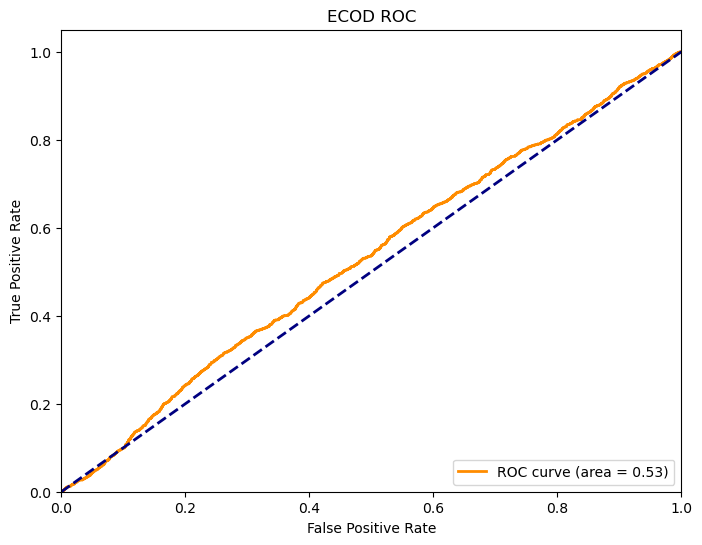

In [11]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

In [12]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [13]:
lunar_score = lunar.decision_function(df)
lunar_score

array([-0.68389773, -0.7783102 , -0.63627714, ..., -0.32848233,
       -0.57520235, -0.5296675 ], dtype=float32)

In [14]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.88764

0.7049645354283054


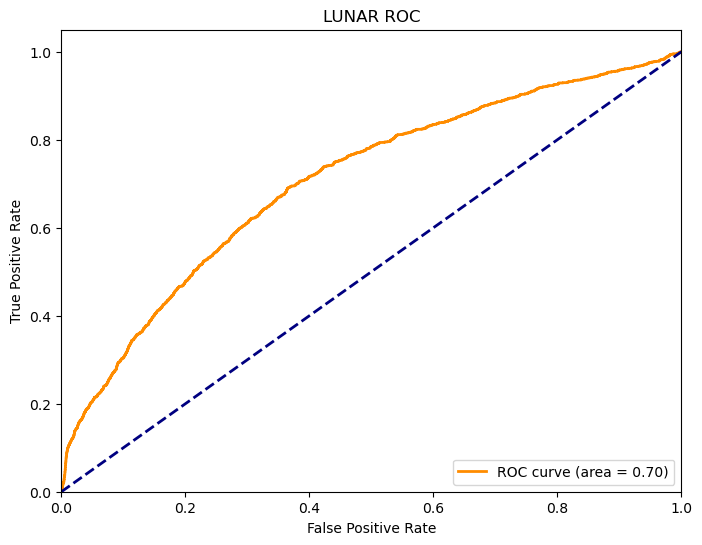

In [16]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [17]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,-0.683898,27.827072,0
1,-0.778310,22.292024,0
2,-0.636277,25.304739,0
3,-0.651400,27.458422,0
4,-0.666232,25.480201,0
...,...,...,...
49995,-0.721408,27.107700,0
49996,-0.712628,23.485210,0
49997,-0.328482,22.940374,0
49998,-0.575202,29.668816,0


In [18]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [19]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9686


In [22]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9701
Test set score: 0.9686


In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.97   0.97   0.9696 0.9698 0.9698]
Average Cross-Validation Score: 0.9698400000000001


0.71290920638609


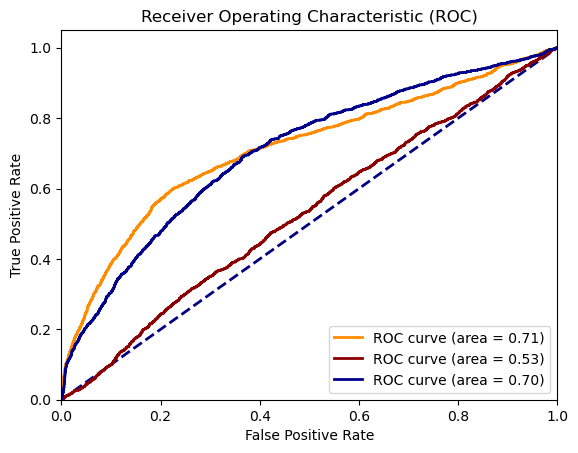

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
# Plot ROC curve
print(roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [8]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.887492 0.8758000000000001 0.96926
0.7001103678180611 0.5289055855640603 0.6914687874901184
